In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

In [2]:
# parameters
a = 0.2
b = 0.8
c = 5.7

# Rossler system 
def rossler(x, y, z, a, b, c):
    dxdt = -y - z
    dydt = x + a * y
    dzdt = b + z * (x - c)
    return np.array([dxdt, dydt, dzdt])

# rk4 method 
def rk4_step(func, r, t, h, *args):
    k1 = h * func(*r, *args)
    k2 = h * func(*(r + 0.5 * k1), *args)
    k3 = h * func(*(r + 0.5 * k2), *args)
    k4 = h * func(*(r + k3), *args)
    return r + (k1 + 2 * k2 + 2 * k3 + k4) / 6

In [3]:
# time parameters
t0 = 0
t_end = 4000
dt = 0.01

# initial values
x0 = 0.0
y0 = 0.0
z0 = 0.0

# Time and state vectors
time = np.arange(t0, t_end, dt)
num_steps = len(time)
states = np.zeros((num_steps, 3))

# Set initial state
states[0] = [x0, y0, z0]

# Main RK4 loop to generate the trajectory
for i in range(1, num_steps):
    states[i] = rk4_step(rossler, states[i-1], time[i-1], dt, a, b, c)

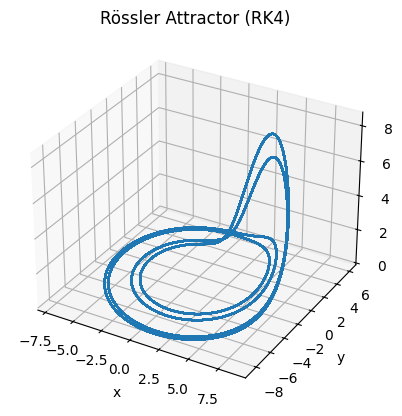

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(states[100000:200000, 0], states[100000:200000, 1], states[100000:200000, 2])
ax.set_title('Rössler Attractor (RK4)')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

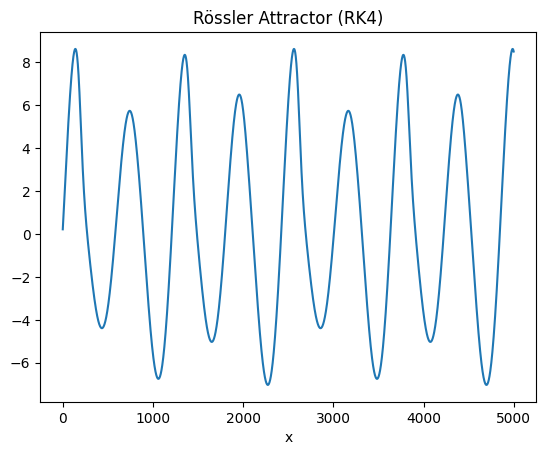

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(states[195000:200000, 0])
ax.set_title('Rössler Attractor (RK4)')
ax.set_xlabel('x')
plt.show()

In [6]:
max(states[195000:200000, 0])

np.float64(8.614133113076381)

In [7]:
b_values = np.linspace(0.1, 1.0, 100)  # Vary b from 0.1 to 1.0
all_peaks = []


In [8]:
for b in b_values:
    states = np.zeros((len(time), 3))
    states[0] = [x0, y0, z0]


    for i in range(1, len(time)):
        states[i] = rk4_step(rossler, states[i-1], time[i-1], dt, a, b, c)

    # Extract x values
    x_values = states[300000:400000, 0]

    # Find peaks in x values
    peaks, _ = find_peaks(x_values)

    # Store peak values of x for this value of b
    all_peaks.append(x_values[peaks])

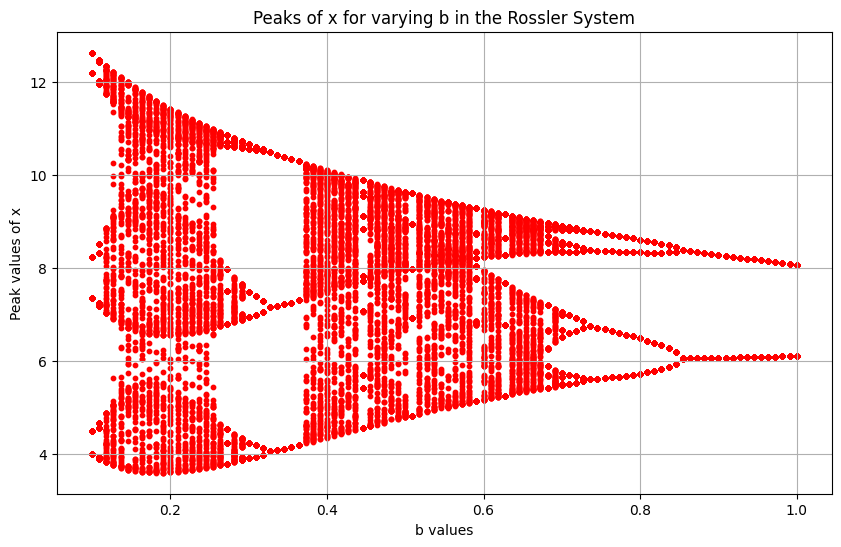

In [9]:
plt.figure(figsize=(10, 6))

for i, b in enumerate(b_values):
    plt.scatter([b] * len(all_peaks[i]), all_peaks[i], color='red', s=10, label=f'b={b:.2f}' if i == 0 else "")

plt.xlabel('b values')
plt.ylabel('Peak values of x')
plt.title('Peaks of x for varying b in the Rossler System')
plt.grid(True)
plt.show()